In [1]:
# Realizar as importações
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

input_path = '../images/'
output_path = 'output/'

if not os.path.exists(output_path):
    os.makedirs(output_path)

# 1.1 - 

In [ ]:
nome = 'house'
imagem_gray = cv2.imread(input_path + nome + '.png', cv2.IMREAD_GRAYSCALE)
imagem_gray = imagem_gray.astype(np.float32)

imagens = []
gamas = [0.25, 0.5, 0.75, 1.0, 1.5, 2.0, 3.0, 5.0, 9.0]
for gama in gamas:
    imagem_gama = cv2.normalize(imagem_gray, None, 0, 1, cv2.NORM_MINMAX)
    imagem_gama = cv2.pow(imagem_gray, 1/gama)
    imagem_gama = cv2.normalize(imagem_gama, None, 0, 255, cv2.NORM_MINMAX)
    imagem_gama = imagem_gama.astype(np.uint8)
    imagens.append(imagem_gama)

for i in range(3):
    plt.figure(figsize=(30, 10))
    for j in range(3):
        plt.subplot(1, 3, j + 1)
        plt.imshow(imagens[3*i + j], cmap='gray', vmin=0, vmax=255)
        plt.title('Imagem Original' if 3*i + j == 3 else f'Gamma = {gamas[3*i + j]}')
        plt.axis('off')
        cv2.imwrite(output_path + "2_" + ('Imagem Original' if 3*i + j == 3 else f'Gamma {gamas[3*i + j]}').replace(" ", "_") + ".png", imagens[3*i + j], [cv2.IMWRITE_PNG_COMPRESSION, 0])
    plt.show()



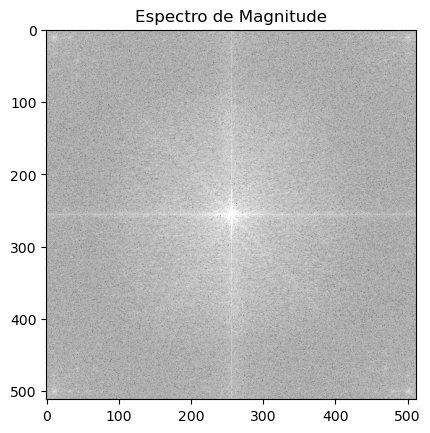

In [2]:
nome = 'house'
imagem_gray = cv2.imread(input_path + nome + '.png', cv2.IMREAD_GRAYSCALE)
imagem_gray = imagem_gray.astype(np.float32)

freq = np.fft.fft2(imagem_gray)
freq = np.fft.fftshift(freq)

magnitude_spectrum = 20 * np.log(np.abs(freq))

plt.imshow(magnitude_spectrum, cmap='gray', vmin=0, vmax=255)
plt.title('Espectro de Magnitude')
plt.show()




## 1.2.2 - Definição dos filtros

In [3]:
# f'Filtro {self.nome} Raio externo: {self.raio_ext} Raio interno: {self.raio_int}'

# f'Filtro {self.nome} Raio: {self.raio_ext}'


linhas, colunas = imagem_gray.shape
clin, ccol = linhas // 2 , colunas // 2

filtros = [[0 for _ in range(3)] for _ in range(2)] + [[[0 for _ in range(3)] for _ in range(3)] for _ in range(2)]
print(filtros)
nome_filtros = ['Passa-baixa', 'Passa-alta', 'Passa-faixa', 'Rejeita-faixa']
raios_ext = [30, 100, 300]
raios_int = [10, 20, 50]
# Passa-baixa
raio = [30, 100, 300]
for i in range(3):
    filtros[0][i] = np.zeros((linhas, colunas), np.uint8)
    cv2.circle(filtros[0][i], (ccol, clin), raio[i], 1, thickness=-1)

# Passa-alta
raio = [30, 100, 300]
for i in range(3):
    filtros[1][i] = np.ones((linhas, colunas), np.uint8)
    cv2.circle(filtros[1][i], (ccol, clin), raio[i], 0, thickness=-1)

# Passa-faixa
raio_a = 100
raio_b = 20
filtros[2] = np.zeros((linhas, colunas), np.uint8)
cv2.circle(filtros[2], (ccol, clin), raio_a, 1, thickness=-1)
filtros[2] = cv2.circle(filtros[2], (ccol, clin), raio_b, 0, thickness=-1)

# Rejeita-faixa
raio_a = 100
raio_b = 20
filtros[3] = np.ones((linhas, colunas), np.uint8)
cv2.circle(filtros[3], (ccol, clin), raio_a, 0, thickness=-1)
filtros[3] = cv2.circle(filtros[3], (ccol, clin), raio_b, 1, thickness=-1)


[[0, 0, 0], [0, 0, 0], [[0, 0, 0], [0, 0, 0], [0, 0, 0]], [[0, 0, 0], [0, 0, 0], [0, 0, 0]]]


## 1.2.3 - Filtragens

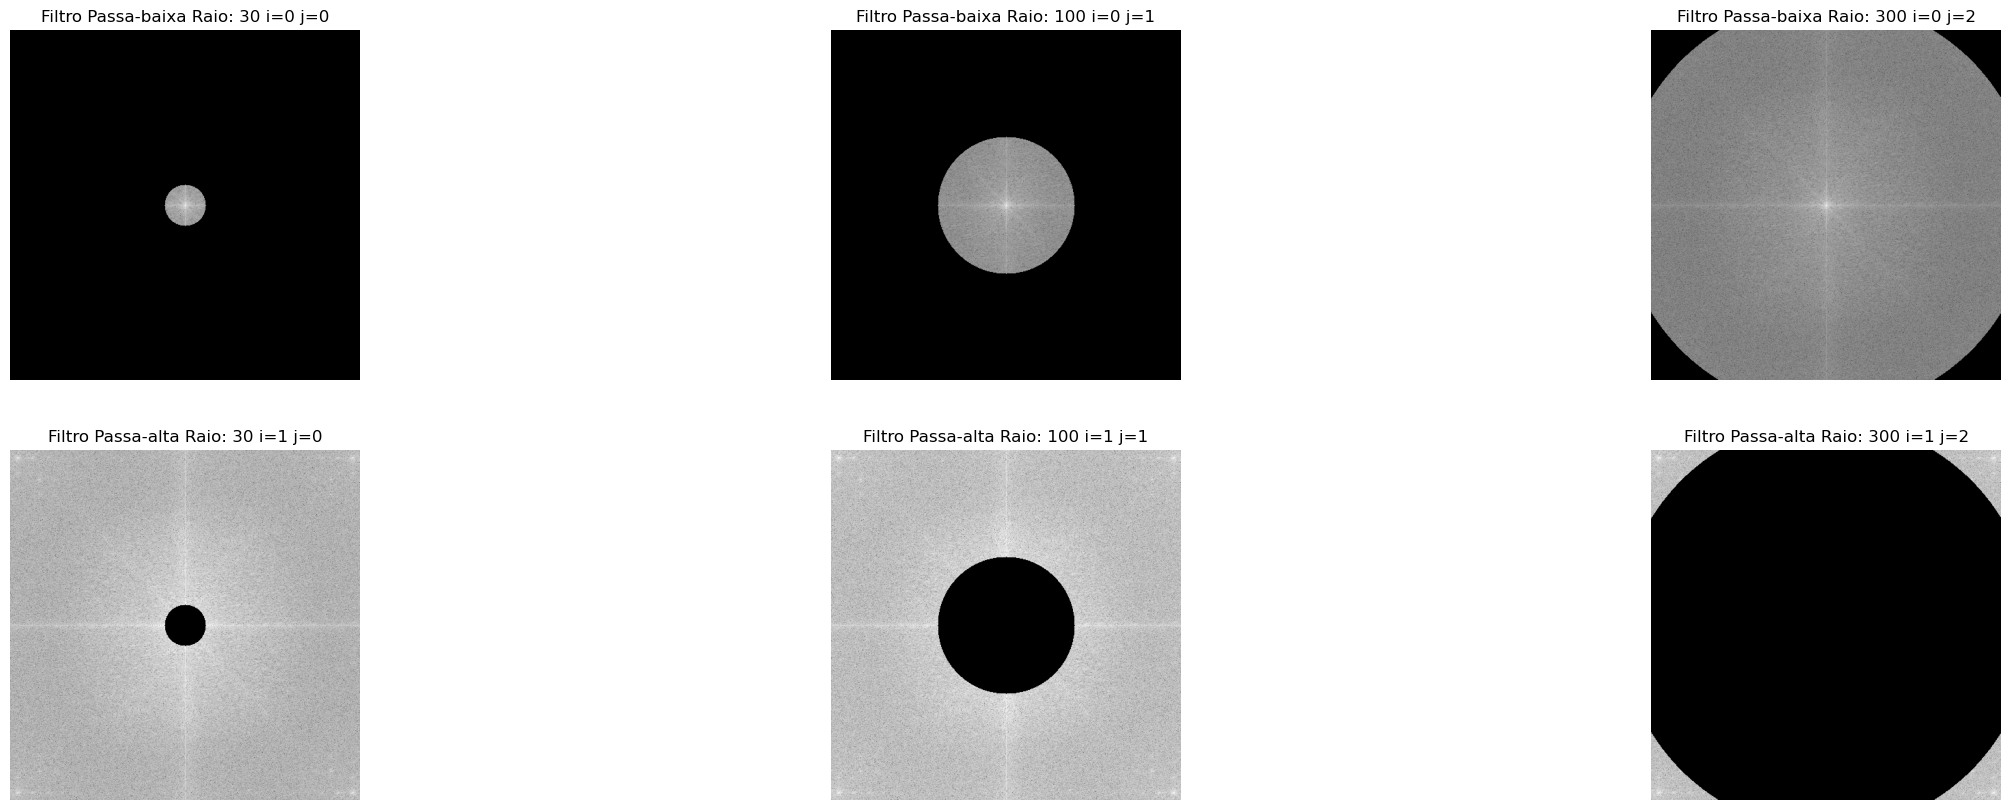

In [13]:
nucleos = [[0 for _ in range(3)] for _ in range(2)] + [[[0 for _ in range(3)] for _ in range(3)] for _ in range(2)]
imagens = [[0 for _ in range(3)] for _ in range(2)] + [[[0 for _ in range(3)] for _ in range(3)] for _ in range(2)]

for i in range(2):
    for j in range(len(filtros[i])):
        nucleos[i][j] = freq * filtros[i][j]
        imagens[i][j] = np.fft.ifft2(nucleos[i][j])
        nucleos[i][j] = np.log(1 + np.abs(nucleos[i][j]))
        imagens[i][j] = np.abs(imagens[i][j])

plt.figure(figsize=(30, 10))
for i in range(2):
    for j in range(len(filtros[i])):
        plt.subplot(2, 3, j + 1 + i * 3)
        plt.imshow(nucleos[i][j], cmap='gray')
        plt.title(f'Filtro {nome_filtros[i]} Raio: {raios_ext[j]} i={i} j={j}')
        plt.axis('off')
        # cv2.imwrite(output_path + f'Filtro {nome_filtros[i]} Raio: {raios_ext[j]}.png', imagens[i][j], [cv2.IMWRITE_PNG_COMPRESSION, 0])
    

## 1.2.4 - Visualização

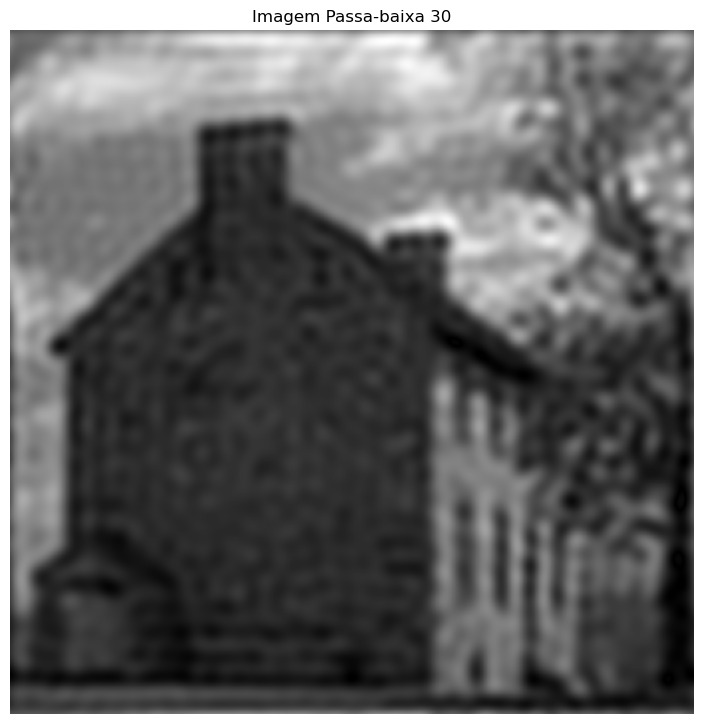

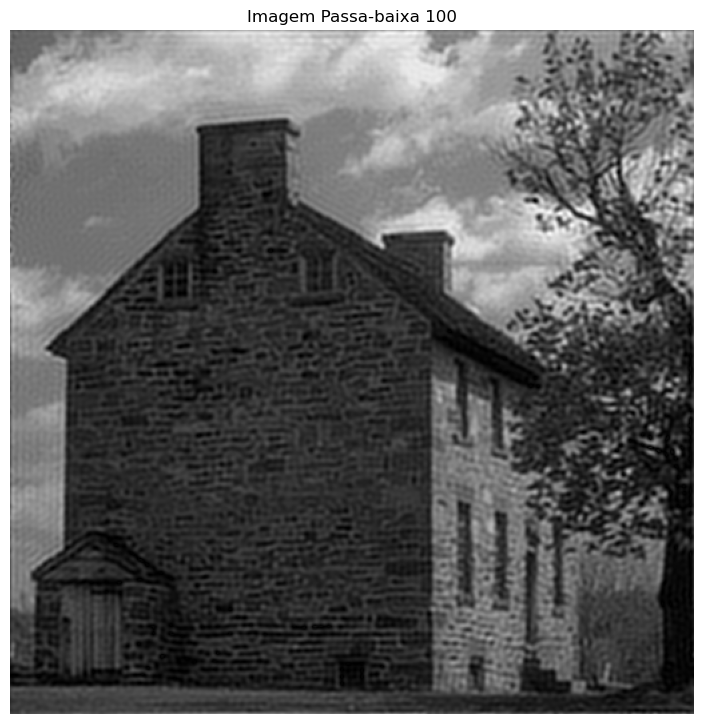

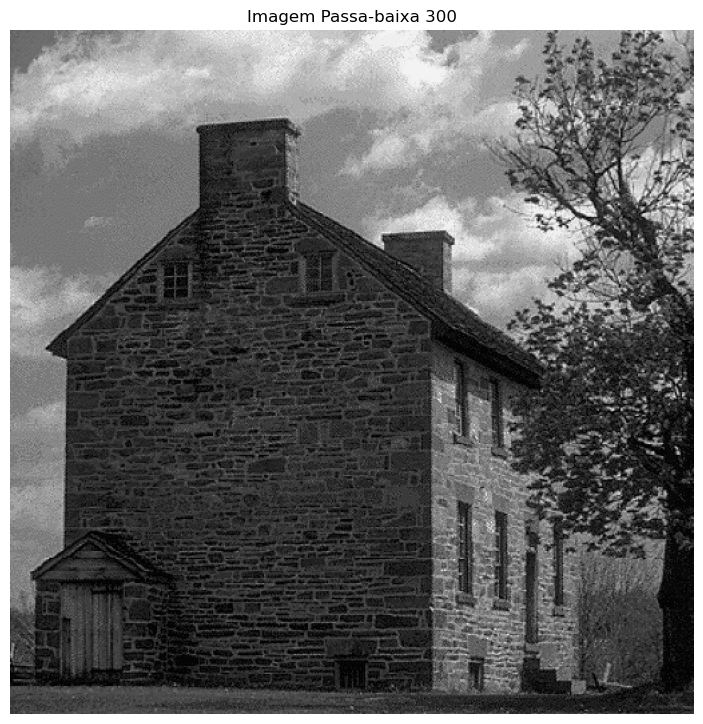

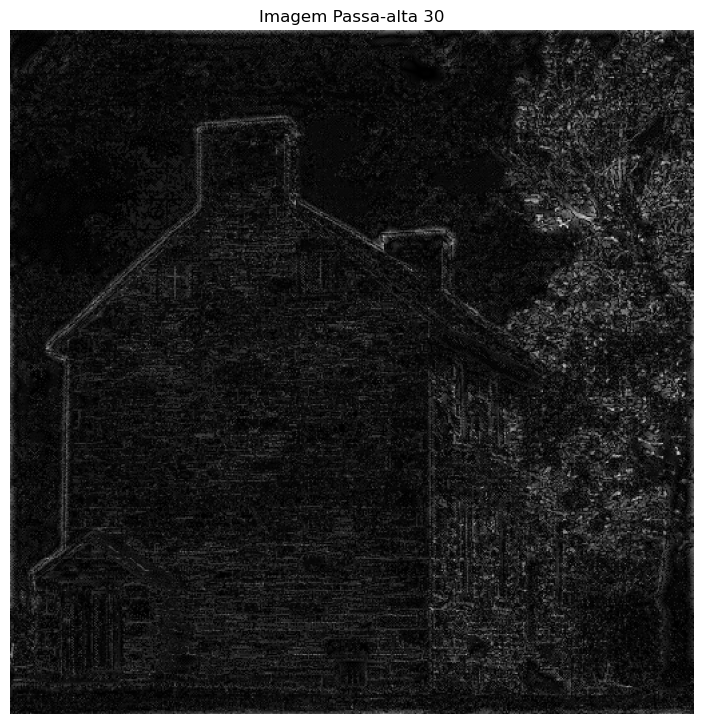

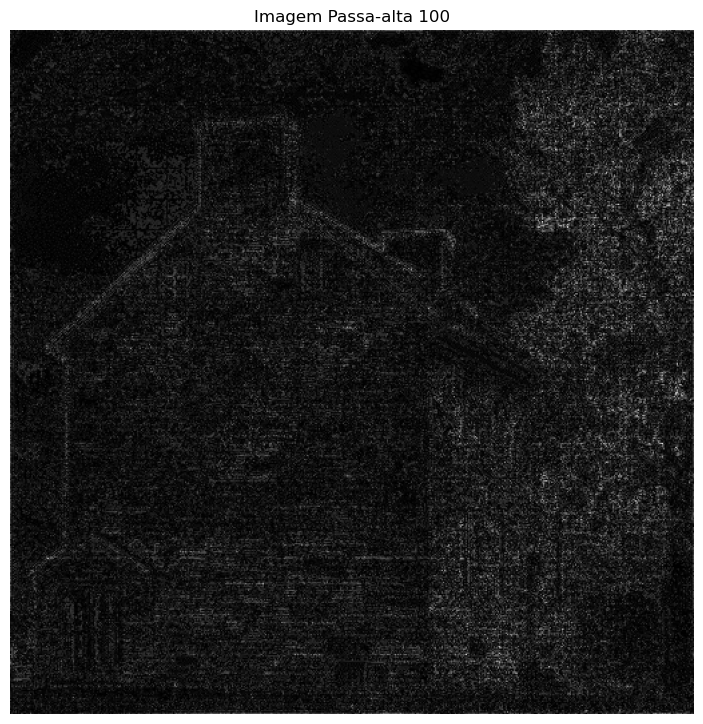

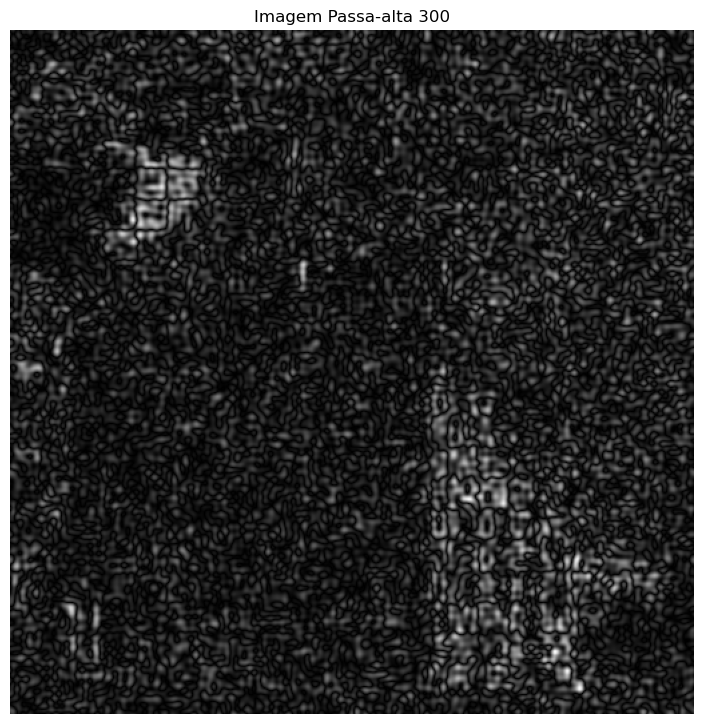

In [14]:
for i in range(2):
    for j in range(len(nucleos[i])):
        plt.figure(figsize=(30, 10))
        plt.subplot(1, 3, j + 1)
        plt.imshow(imagens[i][j], cmap='gray')#, vmin=0, vmax=255)
        plt.title(f'Imagem {nome_filtros[i]} {raios_ext[j]}')
        plt.axis('off')
        plt.show()




    # plt.imshow(np.log(1 + np.abs(nucleo)), cmap='gray')
    # plt.title('Espectro de Magnitude com Filtro Passa-Baixa')
    # plt.show()

    # plt.figure(figsize=(5, 5))
    # plt.imshow(img_back, cmap='gray')
    # plt.title('Imagem Filtrada'), plt.axis('off')
    # plt.show()